## Support Vector Machines(SVM) Algorithm

### Step 1. Import the Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Import the Datasets

In [17]:
df=pd.read_csv("Social_Network_Ads.csv")

### Step 3: Splitting the Dataset into the Training Set and Test Set

In [18]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25, random_state=0)

### Step 4: Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

### Step 5: Training the SVM model on the Training set

In [33]:
from sklearn.svm import SVC
svm=SVC(gamma=5, C=1.0, kernel='rbf', random_state=42)
#svm=SVC(kernel='linear', random_state=0)
svm.fit(x_train,y_train)

SVC(gamma=5, random_state=42)

### Step 6: Predicting a New Result

In [34]:
print(svm.predict(sc.transform([[30,87000]])))

[0]


### Step 7: Predicting the Test Set Results

In [35]:
y_pred=svm.predict(x_test)

In [36]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


### Step 8: Making the Confusion Matrix

[[64  4]
 [ 3 29]]
accuracy_score :  0.93
precision_score :  0.8787878787878788
recall_score :  0.90625
f1_score :  0.8923076923076922


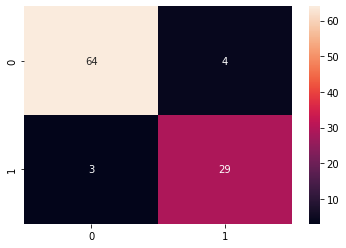

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score ,precision_score, recall_score, f1_score
import seaborn as sn
cm=confusion_matrix(y_test, y_pred)
print(cm)
sn.heatmap(cm,annot=True)
ac=accuracy_score(y_test, y_pred)
pc=precision_score(y_test, y_pred)
rc=recall_score(y_test, y_pred)
fc=f1_score(y_test, y_pred)
print('accuracy_score : ', ac)
print('precision_score : ', pc)
print('recall_score : ', rc)
print('f1_score : ', fc)

### Step 9: Visualising the Training Set Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


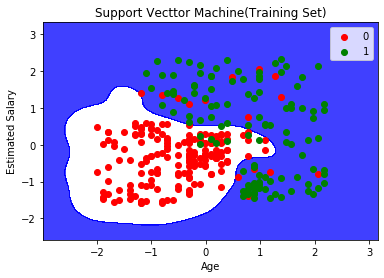

In [38]:
from matplotlib.colors import ListedColormap
x_set, y_set= x_train, y_train
x1,x2 = np.meshgrid(np.arange(start =x_set[:, 0].min() -1, stop=x_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =x_set[:, 1].min() -1, stop=x_set[:, 1].max()+1, step = 0.01))
plt.contourf(x1,x2, svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),alpha=0.75, 
             cmap = ListedColormap(('white','blue')))
plt.xlim((x1.min(),x1.max()))
plt.ylim((x2.min(),x2.max()))
for i,j in enumerate(np.unique(y_set)):
     plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1], c= ListedColormap(('red','green'))(i) ,label= j)
plt.title('Support Vecttor Machine(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Step 10: Visualising the Test Set Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


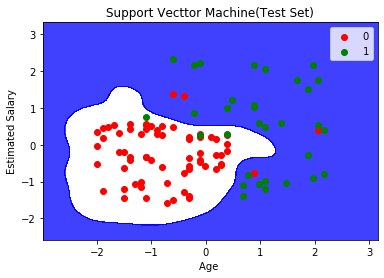

In [39]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vecttor Machine(Test Set)')
plt.xlabel('Age ')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()